In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# ========== FUNCIÓN PARA CALCULAR ACUMULACIÓN ==========
def calcular_acumulacion(anos_aporte, porcentaje_aporte, salario_inicial_sm=1):
    salario_actual = salario_inicial_sm * SALARIO_MINIMO_BASE_2024
    tasa_mensual = TASA_RENTABILIDAD_REAL / 12
    meses = anos_aporte * 12

    capital = 0.0
    aporte_mensual = salario_actual * porcentaje_aporte

    historial_salarios = []

    for mes in range(meses):
        capital = capital * (1 + tasa_mensual) + aporte_mensual

        # Ajustes anuales correctos
        if (mes + 1) % 12 == 0:
            ano = (mes + 1) // 12

            salario_actual *= (1 + CRECIMIENTO_SALARIAL_REAL_ANUAL)

        
            aporte_mensual = salario_actual * porcentaje_aporte
            historial_salarios.append(salario_actual)

    return capital, salario_actual, historial_salarios

# ========== FUNCIÓN PARA CALCULAR AÑOS DE PENSIÓN ==========
def calcular_anos_pension(capital, salario_final_mensual, tasa_reemplazo=1.0):
    pension_mensual = salario_final_mensual * tasa_reemplazo
    tasa_mensual = TASA_RENTABILIDAD_A_VISTA / 12

    capital_restante = capital
    meses = 0
    
    while capital_restante > 0:
        capital_restante *= (1 + tasa_mensual)
        capital_restante -= pension_mensual
        if capital_restante < 0:
            capital_restante += pension_mensual
            meses += capital_restante/pension_mensual
            capital_restante = 0
            

            break
        meses += 1
        if meses % 12 == 0:
            pension_mensual *= (1 + CRECIMIENTO_SALARIAL_REAL_ANUAL)
        if(meses>360):
            break
    

    return meses / 12,capital_restante 



# ========== GRÁFICOS ==========
def crear_graficos(df):
    fig, ax = plt.subplots(figsize=(10, 6))

    
    # Colores para cada porcentaje
    colores = {16: '#1f77b4', 22: '#ff7f0e'}
    
    # 1. Capital acumulado vs años de aporte
    for porcentaje in df['porcentaje_aporte'].unique():
        subset = df[df['porcentaje_aporte'] == porcentaje]
        ax.plot(subset['anos_aporte'], subset['capital_millones'], 
                marker='o', linewidth=2, markersize=8,
                label=f'{int(porcentaje)}% aporte',
                color=colores[porcentaje])
    
    ax.set_xlabel('Años de Aporte')
    ax.set_ylabel('Capital mas Intereses(Millones de ₲s)')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Gráfico adicional: Relación directa
    fig2, ax = plt.subplots(figsize=(10, 6))
    
    for porcentaje in df['porcentaje_aporte'].unique():
        subset = df[df['porcentaje_aporte'] == porcentaje]
        
        # Scatter plot principal
        scatter = ax.scatter(subset['anos_aporte'], subset['anos_pension'],
                           s=150, alpha=0.7,
                           label=f'{int(porcentaje)}% aporte',
                           color=colores[porcentaje])
        
        # Añadir etiquetas con valores
        for _, row in subset.iterrows():
            ax.annotate(f'{row["anos_pension"]:.1f}a',
                       (row['anos_aporte'], row['anos_pension']),
                       xytext=(5, 5), textcoords='offset points',
                       fontsize=8, fontweight='bold',
                       bbox=dict(boxstyle='round,pad=0.3', 
                                facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Años de Aporte (25-32 años)', fontsize=12)
    ax.set_ylabel('Años que Duraría la Pensión', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(title='% de Aporte')
    
   
    
    plt.tight_layout()
    plt.show()
    # Gráfico adicional: Relación directa
    fig2, ax = plt.subplots(figsize=(10, 6))
    
    for porcentaje in df['porcentaje_aporte'].unique():
        subset = df[df['porcentaje_aporte'] == porcentaje]
        
        # Scatter plot principal
        scatter = ax.scatter(subset['anos_aporte'], subset['capital_restante']/1.0e6,
                           s=150, alpha=0.7,
                           label=f'{int(porcentaje)}% aporte',
                           color=colores[porcentaje])
        
        # Añadir etiquetas con valores
        for _, row in subset.iterrows():
            ax.annotate(f'{row["capital_restante"]:.1f}a',
                       (row['capital_restante']/1.0e6, row['capital_restante']/1.0e6),
                       xytext=(5, 5), textcoords='offset points',
                       fontsize=8, fontweight='bold',
                       bbox=dict(boxstyle='round,pad=0.3', 
                                facecolor='white', alpha=0.8))
    
   
    ax.set_xlabel('Años de Aporte (25-32 años)', fontsize=12)
    ax.set_ylabel('Capital Sobrante(Millones de ₲s)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(title='% de Aporte')
    
   
    
    plt.tight_layout()
    plt.show()


SIMULACIÓN DE PENSIONES
Salario Mínimo de Referencia 2024: ₲ 2,818,316
Salario Inicial en SM: 2 SM
Tasa de Rentabilidad Real: 6.0% anual
Crecimiento Salarial Real: 1.0% anual
Tasa de Rentabilidad durante Pensión(A LA VISTA): 4.0% anual
Tasa de Substitución: 100.0% de restitución durante la pensión,

Calculando resultados...

TABLA COMPLETA DE RESULTADOS:
 porcentaje_aporte  anos_aporte  capital_acumulado  capital_millones  anos_pension  salario_mensual_sm  capital_restante
              16.0           25       6.851223e+08        685.122254      9.081916        7.228597e+06                 0
              16.0           26       7.416461e+08        741.646106      9.839542        7.300883e+06                 0
              16.0           27       8.017989e+08        801.798895     10.654809        7.373892e+06                 0
              16.0           28       8.658059e+08        865.805873     11.534229        7.447631e+06                 0
              16.0           29       

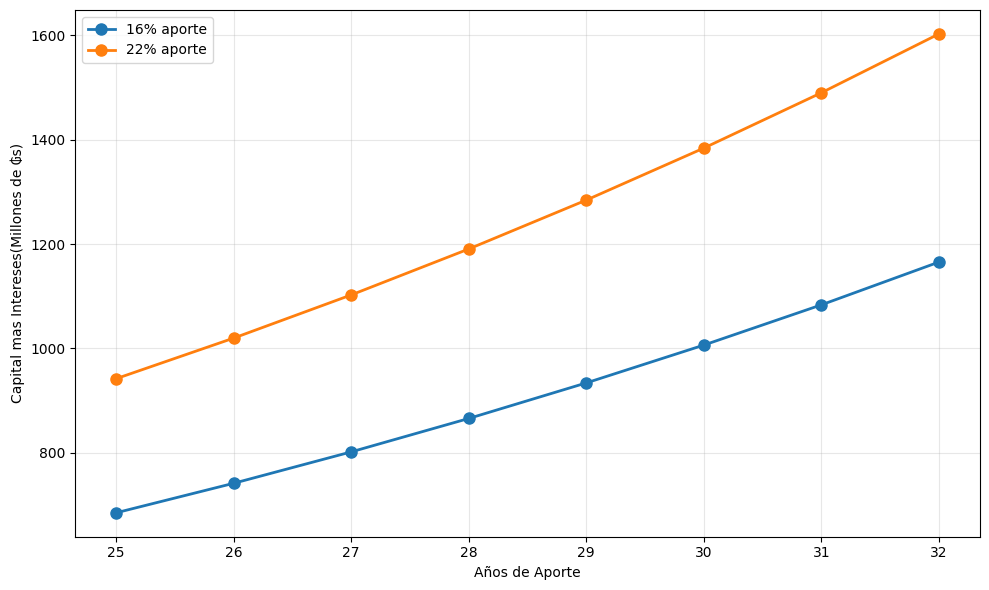

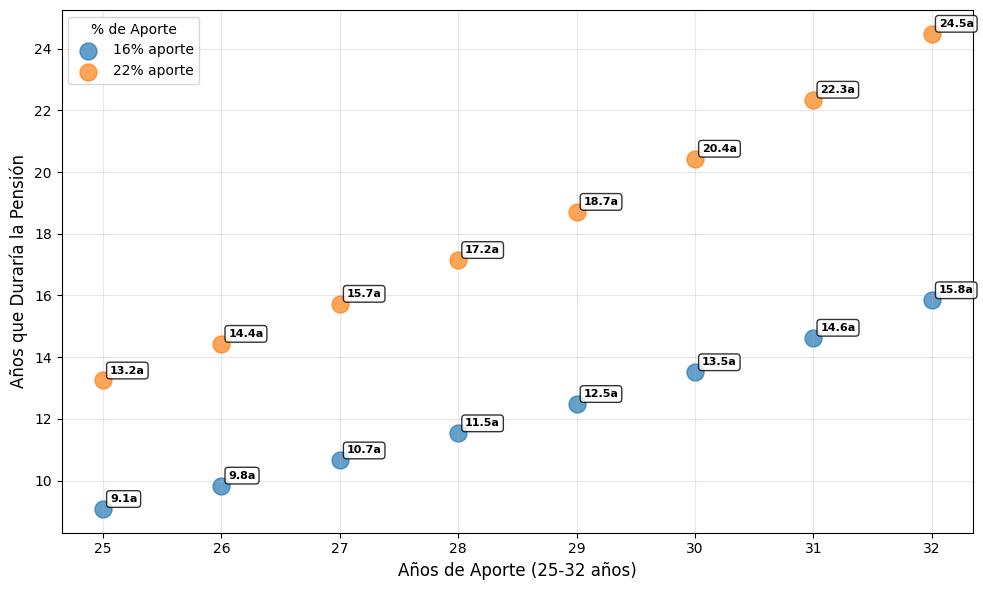

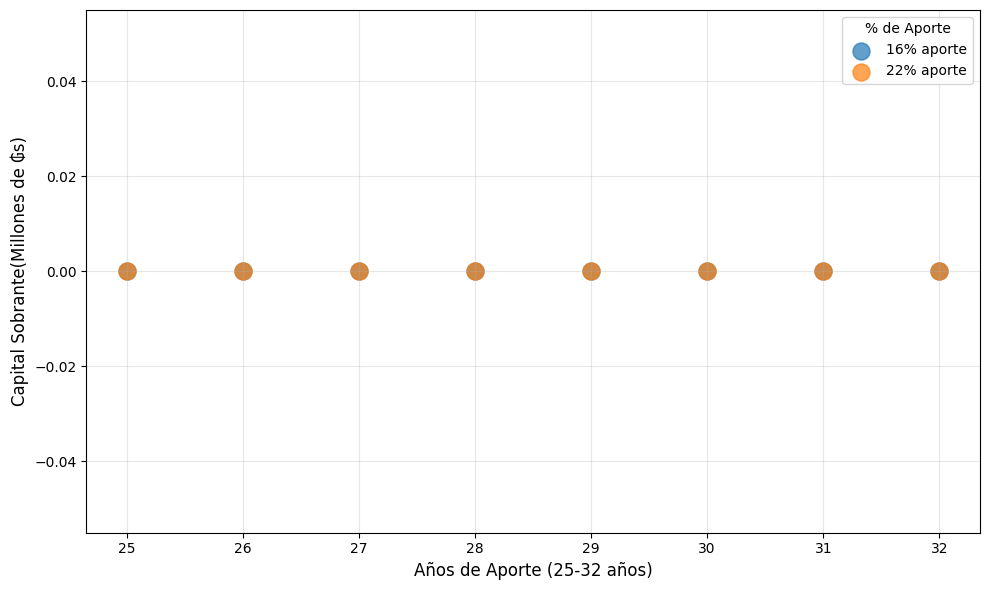


ANÁLISIS COMPARATIVO

Para 25 años de aporte:
  • 16% aporte: 9.1 años de pensión
    (Capital: ₲ 685,122,254)
  • 22% aporte: 13.2 años de pensión
    (Capital: ₲ 942,043,099)

Para 28 años de aporte:
  • 16% aporte: 11.5 años de pensión
    (Capital: ₲ 865,805,873)
  • 22% aporte: 17.2 años de pensión
    (Capital: ₲ 1,190,483,075)

Para 30 años de aporte:
  • 16% aporte: 13.5 años de pensión
    (Capital: ₲ 1,006,353,798)
  • 22% aporte: 20.4 años de pensión
    (Capital: ₲ 1,383,736,472)

Para 32 años de aporte:
  • 16% aporte: 15.8 años de pensión
    (Capital: ₲ 1,165,385,855)
  • 22% aporte: 24.5 años de pensión
    (Capital: ₲ 1,602,405,551)


In [51]:
# ========== CONFIGURACIÓN ==========
SALARIO_MINIMO_BASE_2024 = 2818316  # Salario mínimo real del año base (2024)
TASA_RENTABILIDAD_REAL = 0.06  # 8% anual REAL
CRECIMIENTO_SALARIAL_REAL_ANUAL = 0.01  # 1% REAL anual
TASA_RENTABILIDAD_A_VISTA=0.04  # 4% anual REAL durante la pensión
TASA_SUBSTITUCION=1.0 #83% de restitución durante la pensión
SALARIO_INICIAL_SM=2 #Salario inicial en SM
print("SIMULACIÓN DE PENSIONES")
print(f"Salario Mínimo de Referencia 2024: ₲ {SALARIO_MINIMO_BASE_2024:,}")
print(f"Salario Inicial en SM: {SALARIO_INICIAL_SM} SM")
print(f"Tasa de Rentabilidad Real: {TASA_RENTABILIDAD_REAL*100:.1f}% anual")
print(f"Crecimiento Salarial Real: {CRECIMIENTO_SALARIAL_REAL_ANUAL*100:.1f}% anual")
print(f"Tasa de Rentabilidad durante Pensión(A LA VISTA): {TASA_RENTABILIDAD_A_VISTA*100:.1f}% anual")
print(f"Tasa de Substitución: {TASA_SUBSTITUCION*100:.1f}% de restitución durante la pensión,")
# Generar resultados
print("\nCalculando resultados...")
# Rango de años de aporte
anos_aporte_range = range(25, 33)  # De 25 a 32 años

# Escenarios de aporte
porcentajes = [0.16, 0.22]

# Resultados
resultados = []

for porcentaje in porcentajes:
    for anos_aporte in anos_aporte_range:
        # Calcular capital acumulado
        capital, salario_final, salarios = calcular_acumulacion(anos_aporte, porcentaje,salario_inicial_sm=SALARIO_INICIAL_SM)
        anos_pension, capital_restante = calcular_anos_pension(capital, salario_final,tasa_reemplazo=TASA_SUBSTITUCION)
        salario_final_sm = salario_final / SALARIO_MINIMO_BASE_2024
        resultados.append({
            'porcentaje_aporte': porcentaje * 100,
            'anos_aporte': anos_aporte,
            'capital_acumulado': capital,
            'capital_millones': capital / 1e6,
            'anos_pension': anos_pension,
            'salario_mensual_sm': salario_final,
            'capital_restante': capital_restante
        })

df_resultados = pd.DataFrame(resultados)


# Mostrar tabla completa
print("\nTABLA COMPLETA DE RESULTADOS:")
print(df_resultados.to_string(index=False))

# Crear gráficos
print("\nGenerando gráficos...")
crear_graficos(df_resultados)

# Análisis comparativo
print("\n" + "="*60)
print("ANÁLISIS COMPARATIVO")
print("="*60)

for ano in [25,28,30,32]:
    print(f"\nPara {ano} años de aporte:")
    for porcentaje in [16, 22]:
        fila = df_resultados[(df_resultados['porcentaje_aporte'] == porcentaje) & 
                            (df_resultados['anos_aporte'] == ano)]
        if len(fila) > 0:
            datos = fila.iloc[0]
            print(f"  • {porcentaje}% aporte: {datos['anos_pension']:.1f} años de pensión")
            print(f"    (Capital: ₲ {datos['capital_acumulado']:,.0f})")